In [4]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading the dataset
df = pd.read_excel('/ev_final.xlsx')
print(df)


           uid                    name             vendor_name  \
0     STATIC12  GensolCharge Pvt. Ltd.  GensolCharge Pvt. Ltd.   
1     STATIC14                    REIL                    REIL   
2     STATIC15                    REIL                    REIL   
3     STATIC16                    REIL                    REIL   
4     STATIC17                BluSmart                BluSmart   
...        ...                     ...                     ...   
2700      1028     EESL Nehru Park Met                    EESL   
2701      1028     EESL Nehru Park Met                    EESL   
2702      1028     EESL Nehru Park Met                    EESL   
2703    BSES-1                BSES-DEL           Verdemobility   
2704    BSES-1                BSES-DEL           Verdemobility   

                                                address   latitude  longitude  \
0                       NDSE Grid, BRPL South Extension  28.568238  77.219666   
1                                 Scada offic

In [12]:
print(f'List of columns - {df.columns}')

print(f'Shape of the dataframe - {df.shape}')

List of columns - Index([            'uid',            'name',     'vendor_name',
               'address',        'latitude',       'longitude',
                  'city',         'country',            'open',
                 'close',        'logo_url',           'staff',
         'payment_modes', 'contact_numbers',    'station_type',
           'postal_code',            'zone',                 0,
             'available',        'capacity',   'cost_per_unit',
            'power_type',           'total',            'type',
          'vehicle_type'],
      dtype='object')
Shape of the dataframe - (2705, 25)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              2705 non-null   object 
 1   name             2705 non-null   object 
 2   vendor_name      2705 non-null   object 
 3   address          2705 non-null   object 
 4   latitude         2705 non-null   float64
 5   longitude        2705 non-null   float64
 6   city             2705 non-null   object 
 7   country          2705 non-null   object 
 8   open             2705 non-null   object 
 9   close            2705 non-null   object 
 10  logo_url         2238 non-null   object 
 11  staff            2705 non-null   object 
 12  payment_modes    2705 non-null   object 
 13  contact_numbers  2705 non-null   object 
 14  station_type     2705 non-null   object 
 15  postal_code      2705 non-null   int64  
 16  zone             2410 non-null   object 
 17  0             

In [14]:
df.head().T

,0,1,2,3,4
uid,STATIC12,STATIC14,STATIC15,STATIC16,STATIC17
name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
vendor_name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
address,"NDSE Grid, BRPL South Extension",Scada office kalka ji,Ashram Chowk Mathura Road,Nizamuddin Railway station,"BSES Bhawan, Nehru Place, New Delhi 110048"
latitude,28.568238,28.541995,28.571189,28.588991,28.549427
longitude,77.219666,77.260583,77.259806,77.25324,77.254636
city,Delhi,Delhi,Delhi,Delhi,Delhi
country,India,India,India,India,India
open,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
close,23:59:59,23:59:59,23:59:59,23:59:59,23:59:59


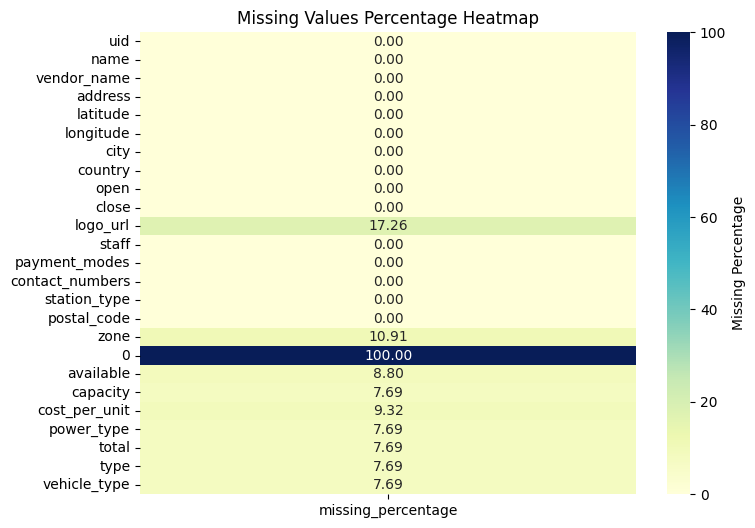

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame with missing percentage information
missing_info = pd.DataFrame({'column': df.columns, 'missing_percentage': missing_percentage})

# Create a heatmap grid highlighting missing values percentage
plt.figure(figsize=(8, 6))
sns.heatmap(missing_info[['missing_percentage']], cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Missing Percentage'})
plt.title('Missing Values Percentage Heatmap')
plt.show()

In [16]:
# Data Processing

df['capacity'].fillna('0 kW', inplace=True)

# Replace 'Delhi' with 'New Delhi' in the 'city' column
df['city'] = df['city'].replace('Delhi', 'New Delhi')

# Make data consistent
df['staff'] = df['staff'].replace('Staffed', 'staffed')
df['staff'] = df['staff'].replace('UnStaffed', 'unstaffed')
df['staff'] = df['staff'].replace('Unstaffed', 'unstaffed')

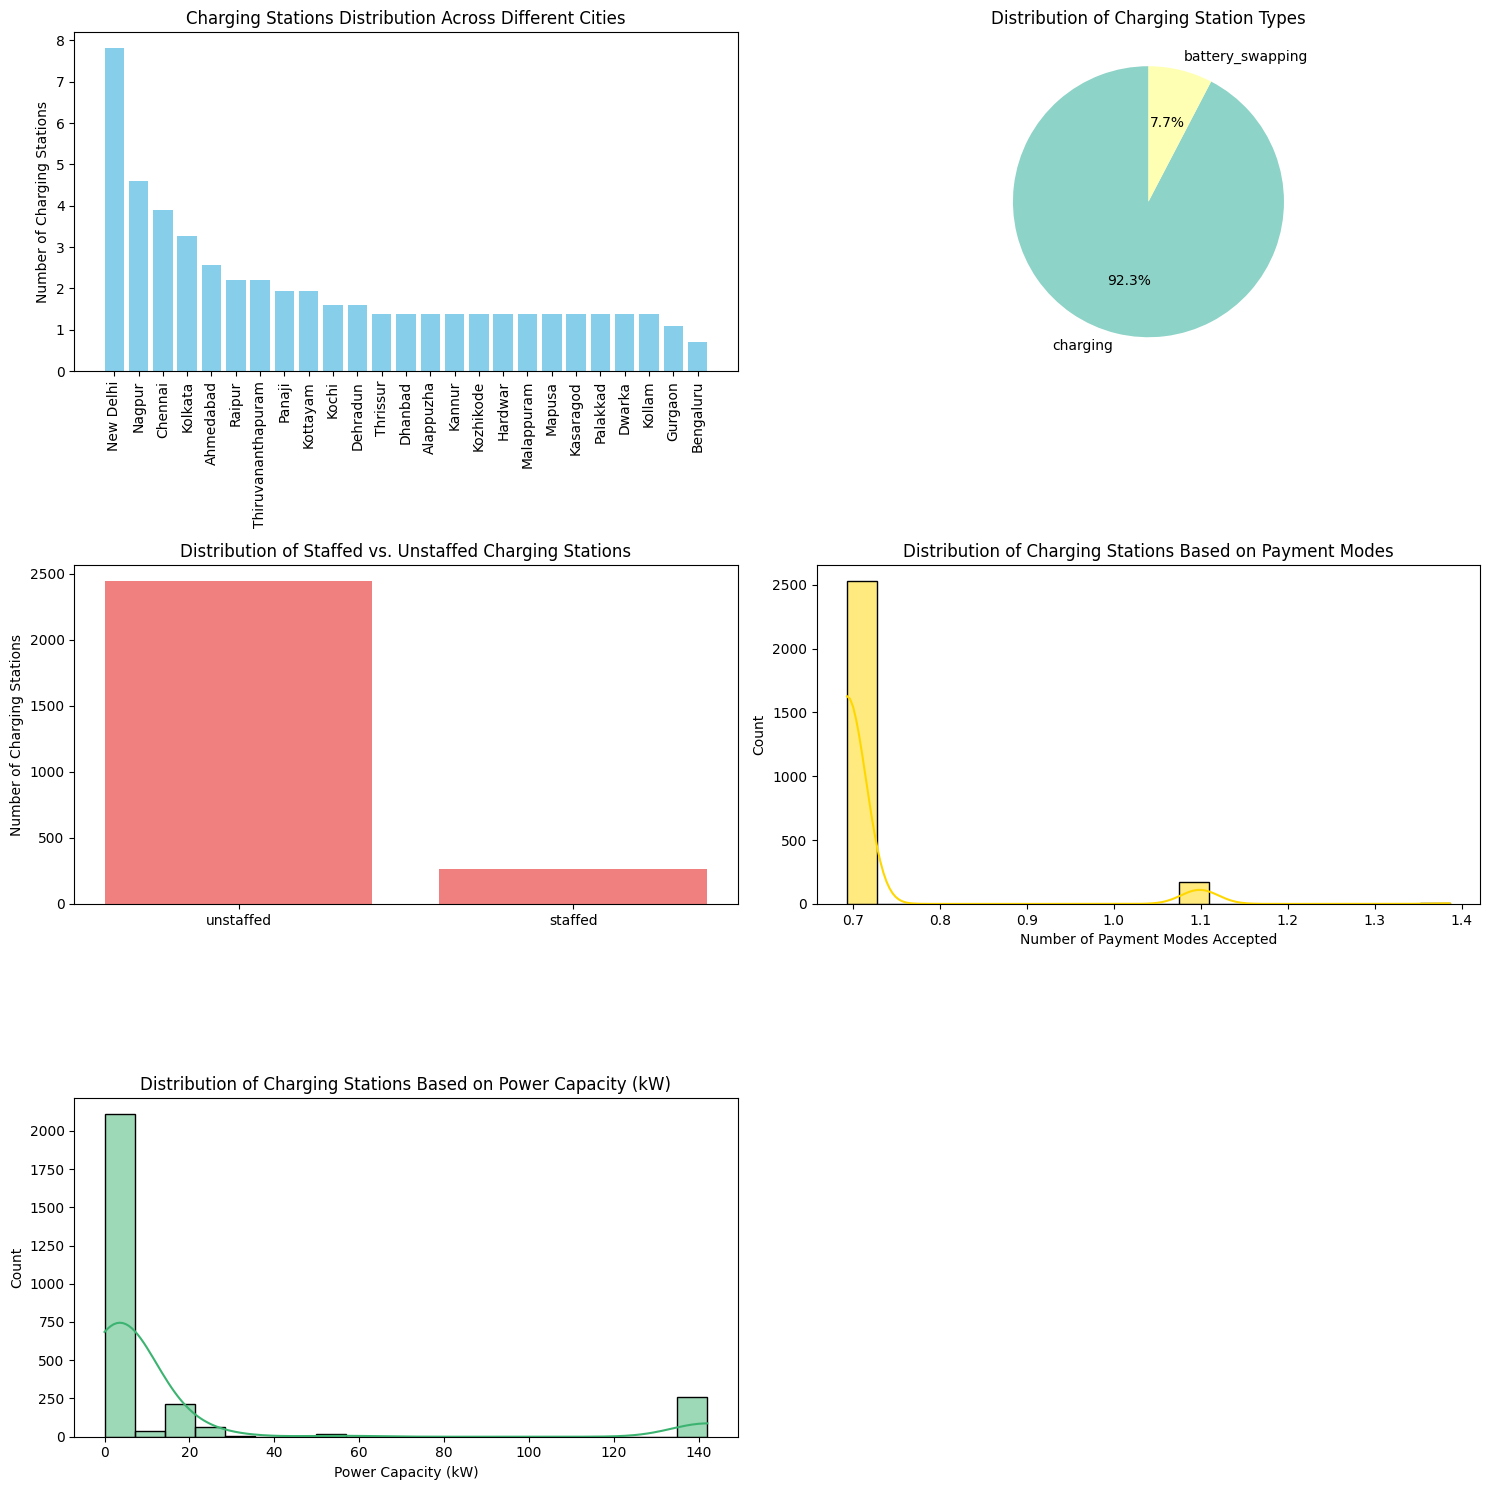

In [17]:
# The Big Picture

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 1. Check the distribution of charging stations across different cities in India.
city_distribution = df['city'].value_counts()
city_distribution = np.log1p(city_distribution)
axes[0, 0].bar(city_distribution.index, city_distribution.values, color='skyblue')
axes[0, 0].set_title('Charging Stations Distribution Across Different Cities')
axes[0, 0].set_ylabel('Number of Charging Stations')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Explore the distribution of charging station types.
station_type_distribution = df['station_type'].value_counts()
axes[0, 1].pie(station_type_distribution, labels=station_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axes[0, 1].set_title('Distribution of Charging Station Types')

# 3. Explore the distribution of stations that are staffed vs. unstaffed.
staff_distribution = df['staff'].value_counts()
axes[1, 0].bar(staff_distribution.index, staff_distribution.values, color='lightcoral')
axes[1, 0].set_title('Distribution of Staffed vs. Unstaffed Charging Stations')
axes[1, 0].set_ylabel('Number of Charging Stations')

# 4. Analyze the distribution of charging stations based on payment modes accepted.
payment_modes_distribution = df['payment_modes'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
payment_modes_distribution = np.log1p(payment_modes_distribution)
sns.histplot(payment_modes_distribution, bins=20, kde=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Charging Stations Based on Payment Modes')
axes[1, 1].set_xlabel('Number of Payment Modes Accepted')

# 5. Explore the distribution of charging stations based on the capacity of power.
df['capacity'] = df['capacity'].replace({'kW': ''}, regex=True)
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')
sns.histplot(df['capacity'], bins=20, kde=True, color='mediumseagreen', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Charging Stations Based on Power Capacity (kW)')
axes[2, 0].set_xlabel('Power Capacity (kW)')

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

        open               close        duration
0 2024-12-10 2024-12-10 23:59:59 0 days 23:59:59
1 2024-12-10 2024-12-10 23:59:59 0 days 23:59:59
2 2024-12-10 2024-12-10 23:59:59 0 days 23:59:59
3 2024-12-10 2024-12-10 23:59:59 0 days 23:59:59
4 2024-12-10 2024-12-10 23:59:59 0 days 23:59:59


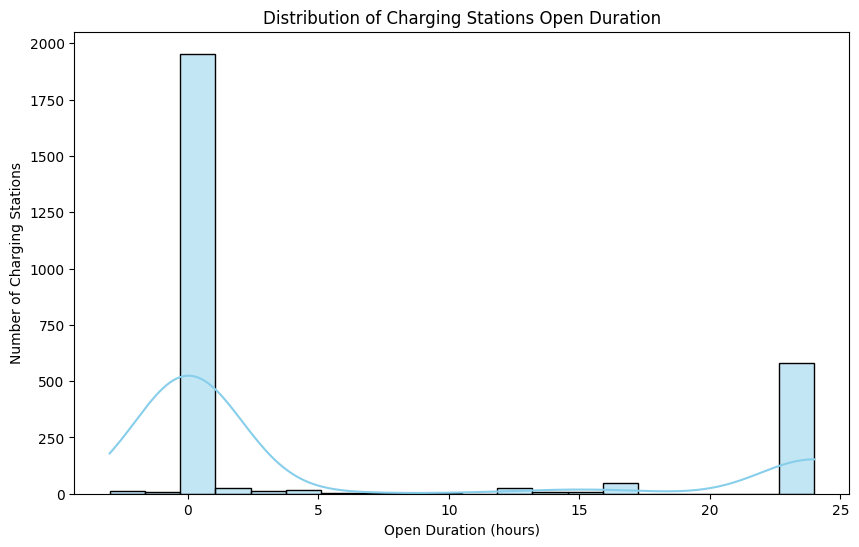

In [18]:
# Time Based Analysis

# Convert 'open' and 'close' columns to datetime
df['open'] = pd.to_datetime(df['open'])
df['close'] = pd.to_datetime(df['close'])

# Calculate the time duration for which charging stations are open
df['duration'] = df['close'] - df['open']

# Display the first few rows of the DataFrame with the calculated duration
print(df[['open', 'close', 'duration']].head())

# Plot the distribution of time durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].dt.total_seconds() / 3600, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Charging Stations Open Duration')
plt.xlabel('Open Duration (hours)')
plt.ylabel('Number of Charging Stations')
plt.show()

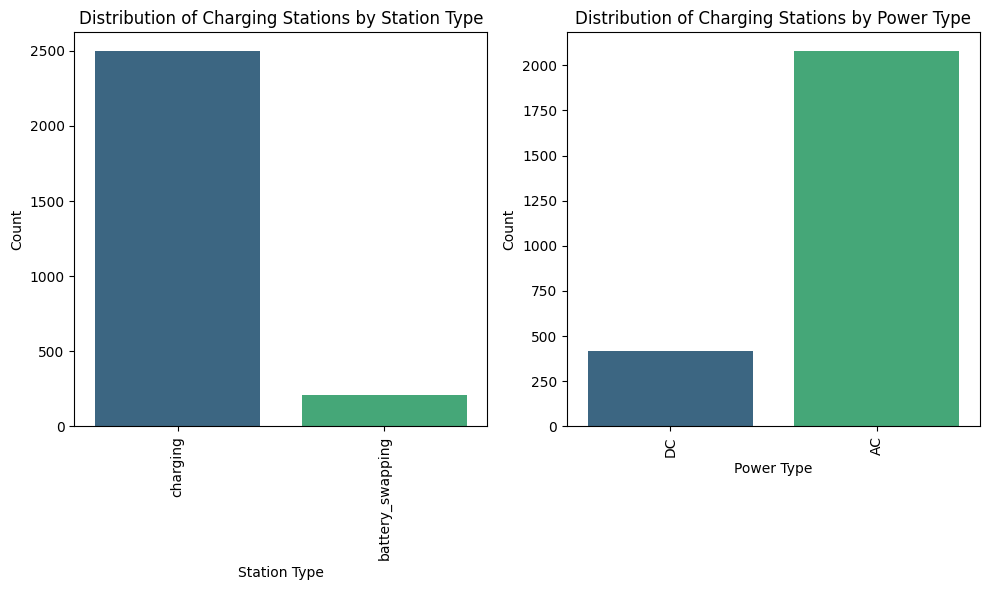

In [19]:
# Station Type vs Power Type

# Create subplots for station type and power type
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Investigate the distribution of cost per unit across different station types
sns.countplot(x='station_type', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Charging Stations by Station Type')
axes[0].set_xlabel('Station Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Investigate the distribution of cost per unit across different power types
sns.countplot(x='power_type', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Charging Stations by Power Type')
axes[1].set_xlabel('Power Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

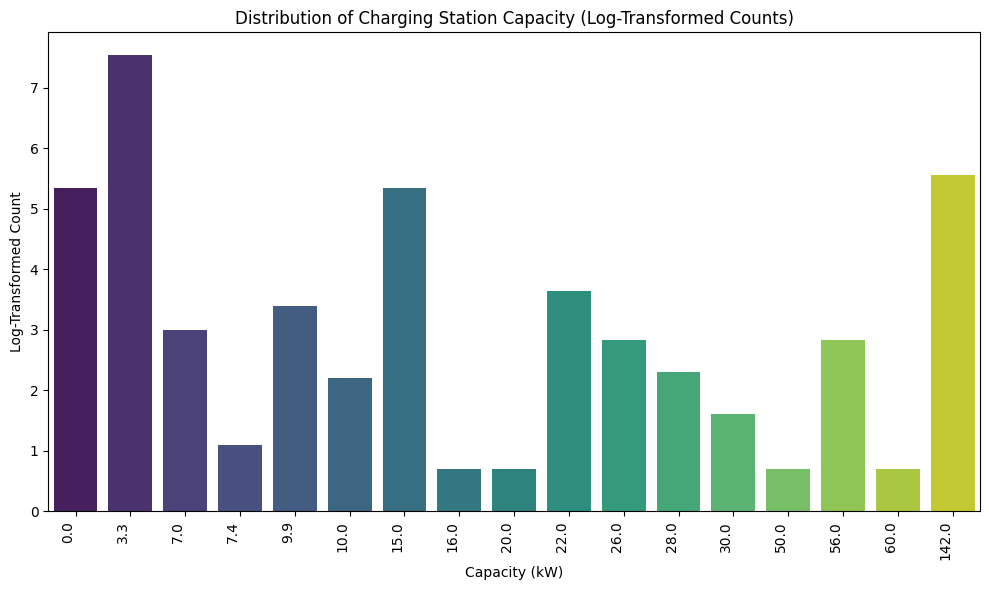

In [20]:
# Capacity Analysis

capacity_counts = df['capacity'].value_counts()

# Apply logarithm transformation to count values
log_counts = np.log1p(capacity_counts)

# Plot the distribution of charging station capacity with log-transformed counts
plt.figure(figsize=(10, 6))
sns.barplot(x=log_counts.index, y=log_counts.values, palette='viridis')
plt.title('Distribution of Charging Station Capacity (Log-Transformed Counts)')
plt.xlabel('Capacity (kW)')
plt.ylabel('Log-Transformed Count')
plt.xticks(rotation=90, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

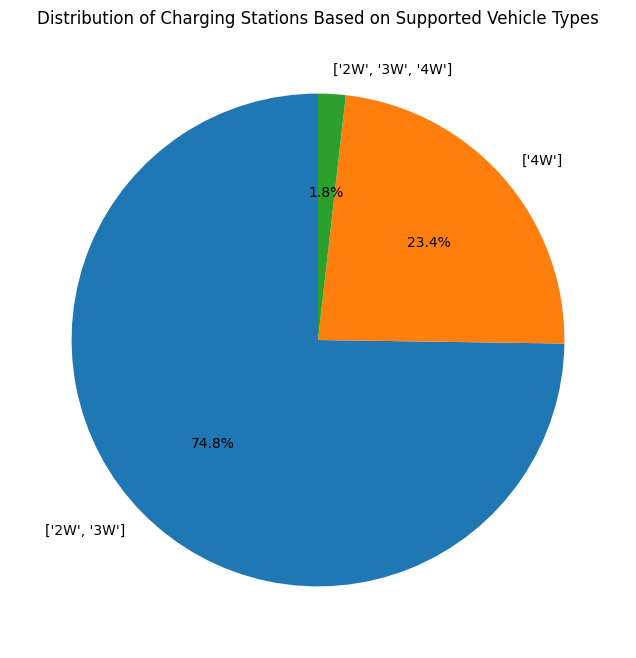

In [21]:
# Charging Station vs Vehicles Types

# Create a pie chart for the distribution of charging stations based on supported vehicle types
vehicle_type_counts = df['vehicle_type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Charging Stations Based on Supported Vehicle Types')

# Show the plot
plt.show()

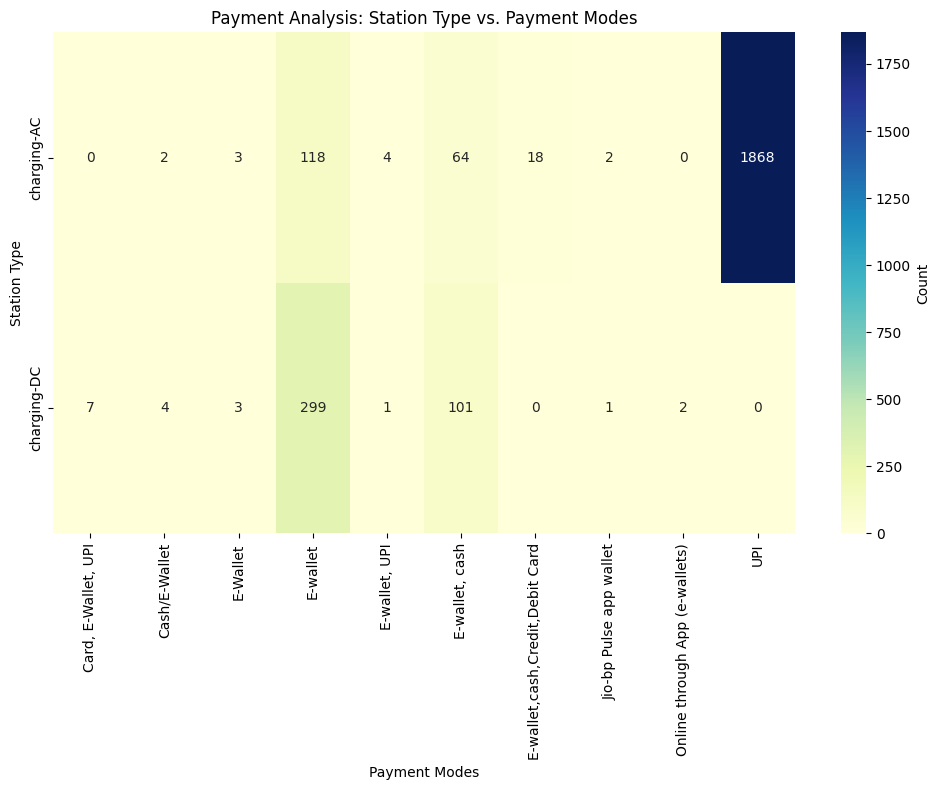

In [22]:
# Payment Mode Analysis
# Create a pivot table for payment analysis
payment_pivot = df.pivot_table(index=['station_type', 'power_type'], columns='payment_modes', values='vehicle_type', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(payment_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Payment Analysis: Station Type vs. Payment Modes')
plt.xlabel('Payment Modes')
plt.ylabel('Station Type')

# Adjust layout
plt.tight_layout()
plt.show()

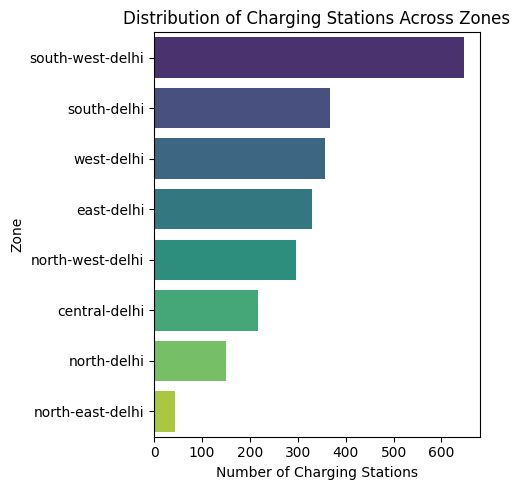

In [23]:
# Zone Wise Analysis

# Calculate the counts for each zone
zone_counts = df['zone'].value_counts()

# Sort the zones based on the counts
sorted_zones = zone_counts.sort_values(ascending=False).index

# Create a horizontal bar plot for the distribution of charging stations across different zones
plt.figure(figsize=(5, 5))
sns.countplot(y='zone', data=df, order=sorted_zones, palette='viridis')
plt.title('Distribution of Charging Stations Across Zones')
plt.ylabel('Zone')
plt.xlabel('Number of Charging Stations')

# Adjust layout
plt.tight_layout()
plt.show()

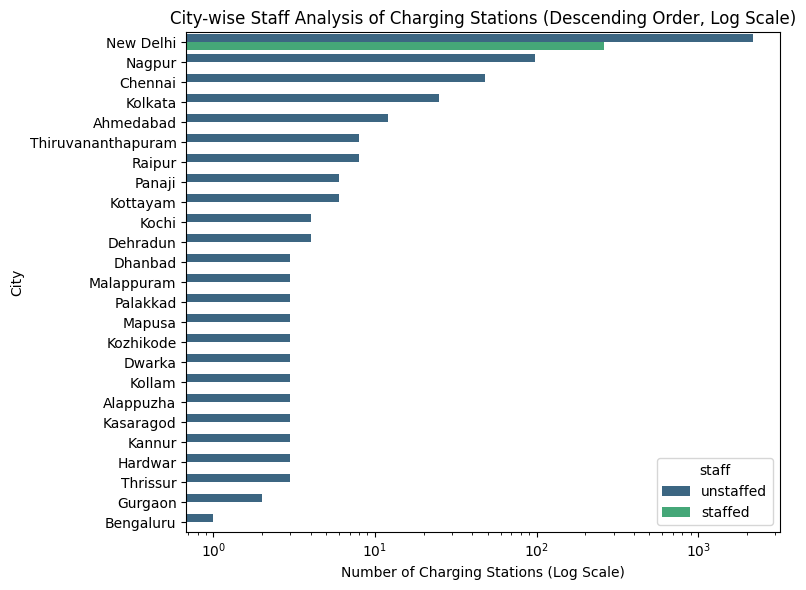

In [24]:
# Staff Analysis

# Calculate the total number of charging stations in each city
city_station_counts = df.groupby('city')['uid'].count().reset_index()

# Sort the cities in descending order based on the total number of charging stations
sorted_cities = city_station_counts.sort_values(by='uid', ascending=False)['city']

# Create a horizontal count plot for the distribution of staffed and unstaffed charging stations across different cities
plt.figure(figsize=(8, 6))
sns.countplot(y='city', hue='staff', data=df, order=sorted_cities, palette='viridis')

# Apply a logarithmic scale to the x-axis
plt.xscale('log')

plt.title('City-wise Staff Analysis of Charging Stations (Descending Order, Log Scale)')
plt.ylabel('City')
plt.xlabel('Number of Charging Stations (Log Scale)')

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
# Geospatial Analysis With Folium

import folium
from folium.plugins import MarkerCluster


# Create a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
charging_map = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(charging_map)

# Add markers for each charging station
for index, row in df.iterrows():
    popup_text = f"<b>{row['name']}</b><br>Vendor: {row['vendor_name']}<br>Contact: {', '.join(map(str, row['contact_numbers']))}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster)

charging_map

Output hidden; open in https://colab.research.google.com to view.

# New Section